In [1]:
import ssam

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
spots = pd.read_csv('./data/raw/s3_spot_table.csv', usecols=["xc", "yc", "gene", "cell"]).rename(columns={"xc": "x", "yc": "y"}).set_index('gene')

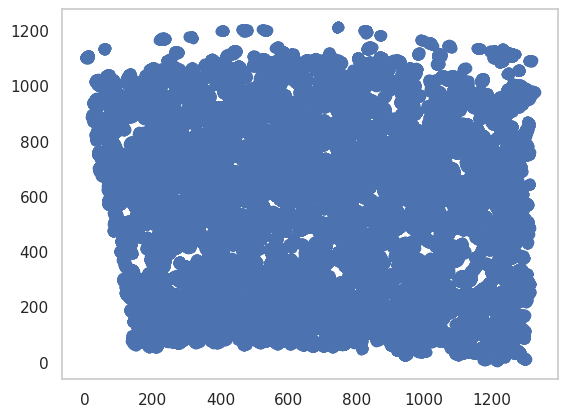

In [4]:
import matplotlib.pyplot as plt
plt.scatter(spots.x, spots.y)

In [5]:
#um 단위 맞추기
#um_per_pixel = 0.1
#spots.x = spots.x*um_per_pixel
#spots.y = spots.y*um_per_pixel

#여백을 없애기 위한 과정
#spots.x -= spots.x.min()
#spots.y -= spots.y.min()

In [6]:
#회전하는 과정
#import numpy as np
#beta = 3.65568224985292
#rotm = np.array([[np.cos(beta), np.sin(beta)], [-np.sin(beta), np.cos(beta)]])
#pos_um = np.array([spots.x, spots.y])
#rot_um = np.dot(pos_um.T, rotm)
#rot_um[:, 0] -= np.min(rot_um[:, 0])
#rot_um[:, 1] -= np.min(rot_um[:, 1])

In [7]:
#spots.x = rot_um[:, 0]
#spots.y = rot_um[:, 1]

In [8]:
spots

,cell,x,y
gene,,,
Fezf2,1605,1296.718027,813.958480
Fezf2,2496,1302.424423,844.131209
Fezf2,1605,1293.752097,822.910508
Fezf2,1605,1292.981468,825.102131
Fezf2,3929,1254.284721,915.218969
...,...,...,...
Parm1,407,115.997457,502.193148
Parm1,4354,134.008161,429.477827
Parm1,3478,107.807802,398.245527


In [3]:
ds = ssam.SSAMDataset("data/processed/ssam-osmfish")
analysis = ssam.SSAMAnalysis(ds, ncores=40, verbose=True)

Loaded existing KDE results.
Loaded existing local maxima.
Loaded a precomputed normalized vector field.
Loaded existing cluster labels.
Loaded an existing t-SNE result.
Loaded an existing UMAP result.
Loaded existing cell type maps.
Loaded existing filtered cell type maps.
Loaded existing cell type binned centers and counts.
Loaded existing inferred domains.


In [11]:
width = int(spots.x.max())
height = int(spots.y.max())
analysis.run_kde(locations=spots, width=width, height=height)

Running KDE for gene Alcam...


Saving KDE for gene Alcam...
Running KDE for gene Chodl...
Saving KDE for gene Chodl...
Running KDE for gene Cux2...
Saving KDE for gene Cux2...
Running KDE for gene Fezf2...
Saving KDE for gene Fezf2...
Running KDE for gene Foxp2...
Saving KDE for gene Foxp2...
Running KDE for gene Gad2...
Saving KDE for gene Gad2...
Running KDE for gene Galnt14...
Saving KDE for gene Galnt14...
Running KDE for gene Grin3a...
Saving KDE for gene Grin3a...
Running KDE for gene Kcnip4...
Saving KDE for gene Kcnip4...
Running KDE for gene Kcnk2...
Saving KDE for gene Kcnk2...
Running KDE for gene Lhx6...
Saving KDE for gene Lhx6...
Running KDE for gene Mpped1...
Saving KDE for gene Mpped1...
Running KDE for gene Parm1...
Saving KDE for gene Parm1...
Running KDE for gene Pde1a...
Saving KDE for gene Pde1a...
Running KDE for gene Prox1...
Saving KDE for gene Prox1...
Running KDE for gene Pvalb...
Saving KDE for gene Pvalb...
Running KDE for gene Rorb...
Saving KDE for gene Rorb...
Running KDE for gene Satb

In [12]:
#_load_kde시 내부적으로 계산되는 것 같아서 생략
#exp_thres = 0.027
#norm_thres = 0.2

In [13]:
analysis.find_localmax()

Found 2787 local max vectors.


In [14]:
analysis.normalize_vectors()

Normalizing vectors...
Normalizing vector field...
Processing chunk 1 (of 1)...


In [15]:
analysis.scale_vectors()

Scaling data...
Processing chunk 1 (of 1)...


In [16]:
#ds.plot_l1norm()
#idx = (ds.vf_normalized.sum(axis=1) > 0).compute()
#ds.vf_normalized[idx] = ((ds.vf_normalized[idx] - ds.normalized_vectors.mean(axis=0)) / ds.normalized_vectors.std(axis=0)).compute()
#ds.normalized_vectors = (ds.normalized_vectors - ds.normalized_vectors.mean(axis=0)) / ds.normalized_vectors.std(axis=0)

In [17]:
analysis.cluster_vectors(resolution=1.0, outlier_detection_method=None, subclustering=False)

Found 15 clusters


In [18]:
ds.run_tsne()

In [19]:
ds.run_umap()

/home/ng4812/miniconda3/envs/ome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


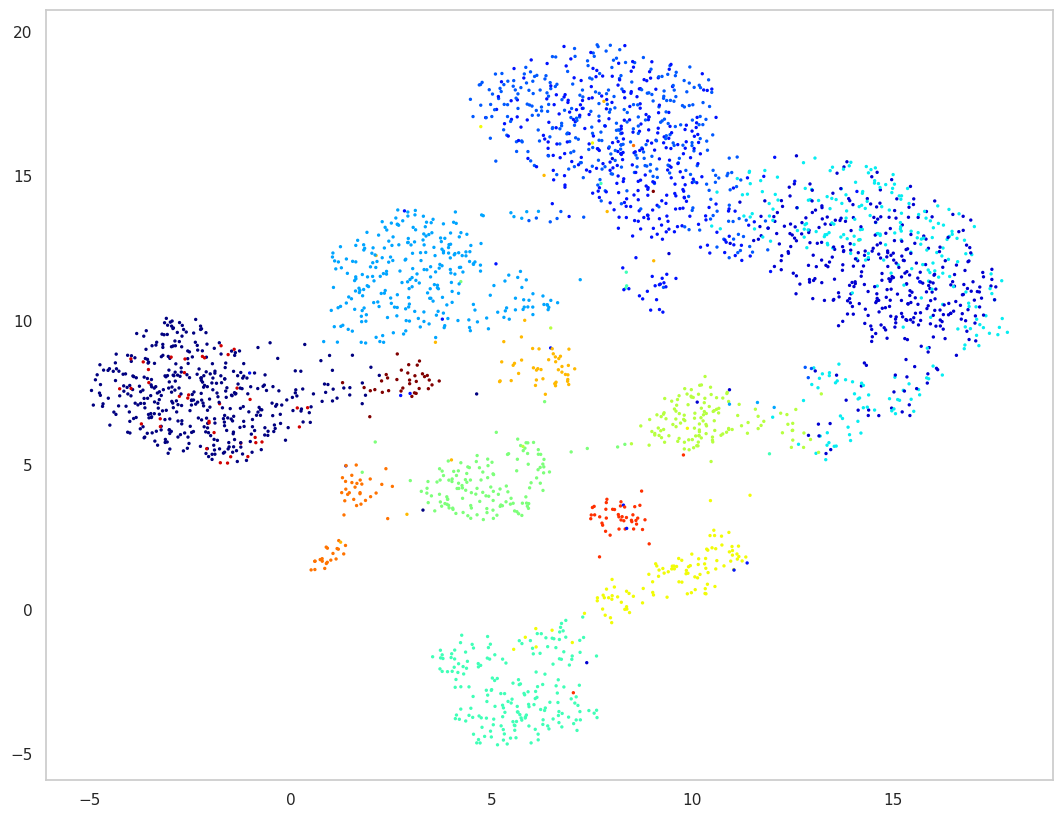

In [20]:
plt.figure(figsize=[13,10])
ds.plot_umap(s=2)

In [21]:
analysis.map_celltypes()

Generating cell-type map for centroid #0...
Processing chunk (0/1)...
Generating cell-type map for centroid #1...
Processing chunk (0/1)...
Generating cell-type map for centroid #2...
Processing chunk (0/1)...
Generating cell-type map for centroid #3...
Processing chunk (0/1)...
Generating cell-type map for centroid #4...
Processing chunk (0/1)...
Generating cell-type map for centroid #5...
Processing chunk (0/1)...
Generating cell-type map for centroid #6...
Processing chunk (0/1)...
Generating cell-type map for centroid #7...
Processing chunk (0/1)...
Generating cell-type map for centroid #8...
Processing chunk (0/1)...
Generating cell-type map for centroid #9...
Processing chunk (0/1)...
Generating cell-type map for centroid #10...
Processing chunk (0/1)...
Generating cell-type map for centroid #11...
Processing chunk (0/1)...
Generating cell-type map for centroid #12...
Processing chunk (0/1)...
Generating cell-type map for centroid #13...
Processing chunk (0/1)...
Generating cell-

In [22]:
analysis.filter_celltypemaps(min_r=0.3)

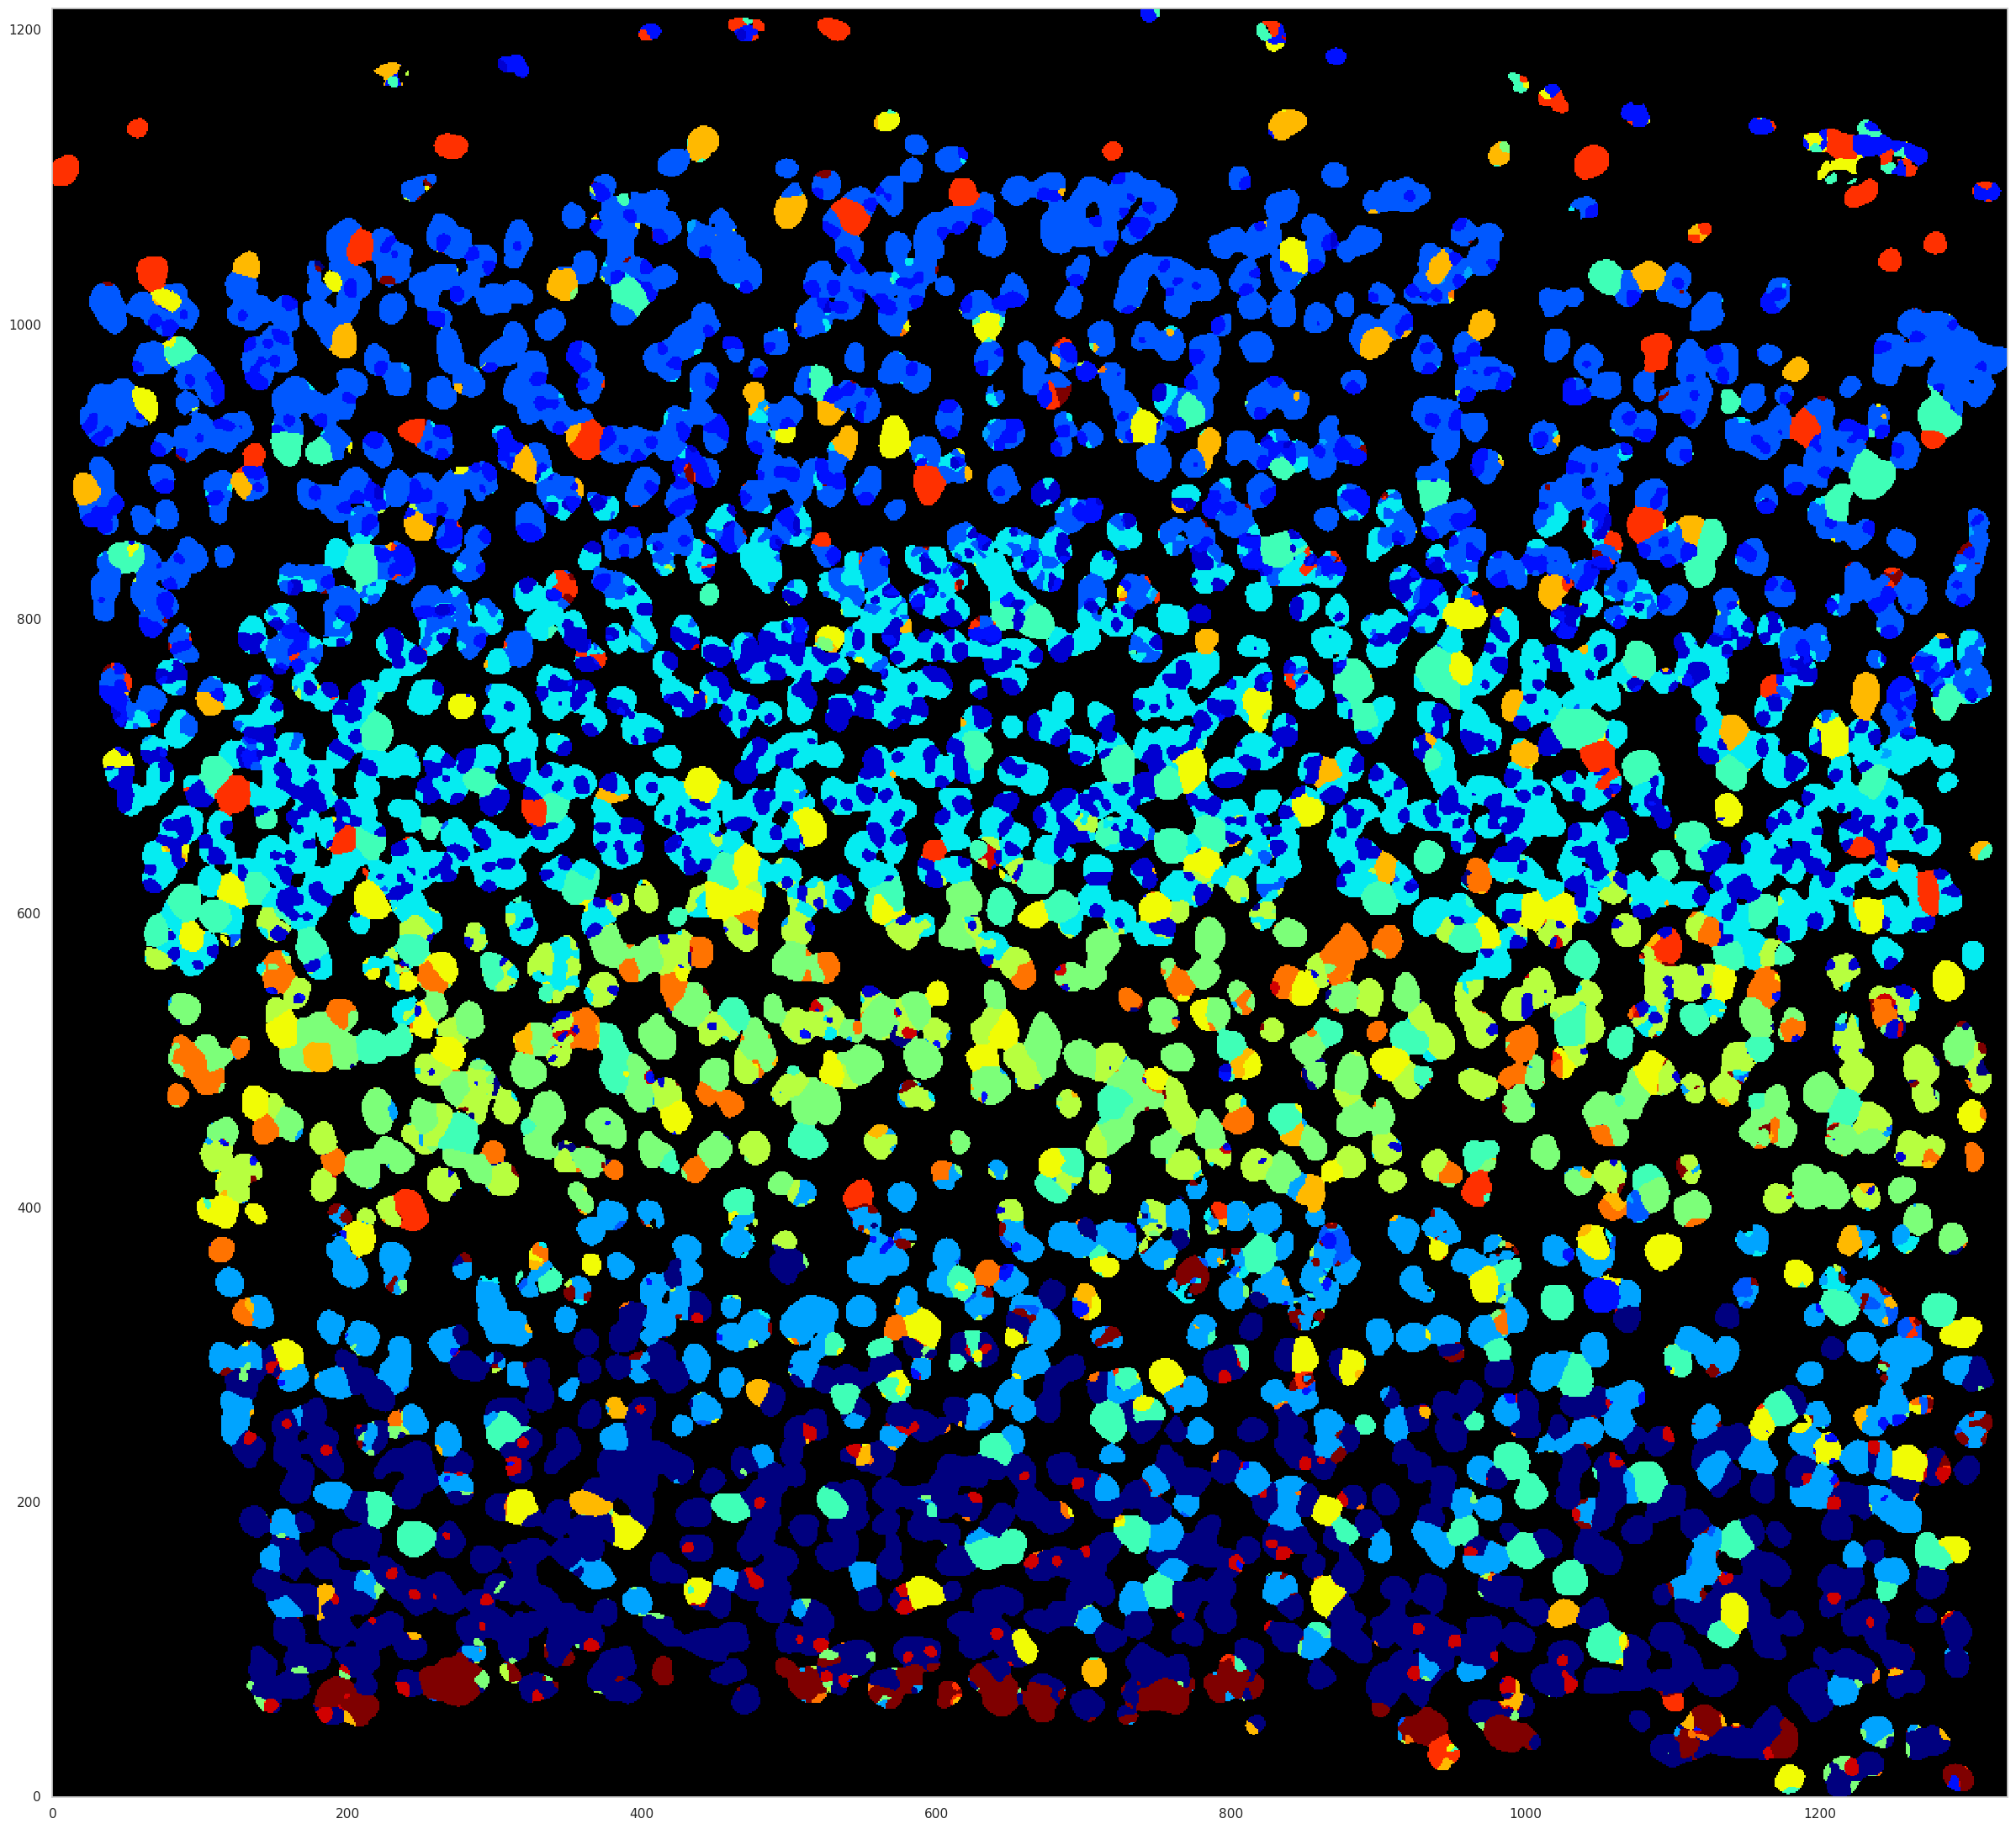

In [23]:
plt.figure(figsize=[30, 30])
ds.plot_celltypes_map()

In [24]:
analysis.bin_celltypemaps(step=10, radius=100)

In [25]:
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.8, norm_thres=4000)

/home/ng4812/miniconda3/envs/ome/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


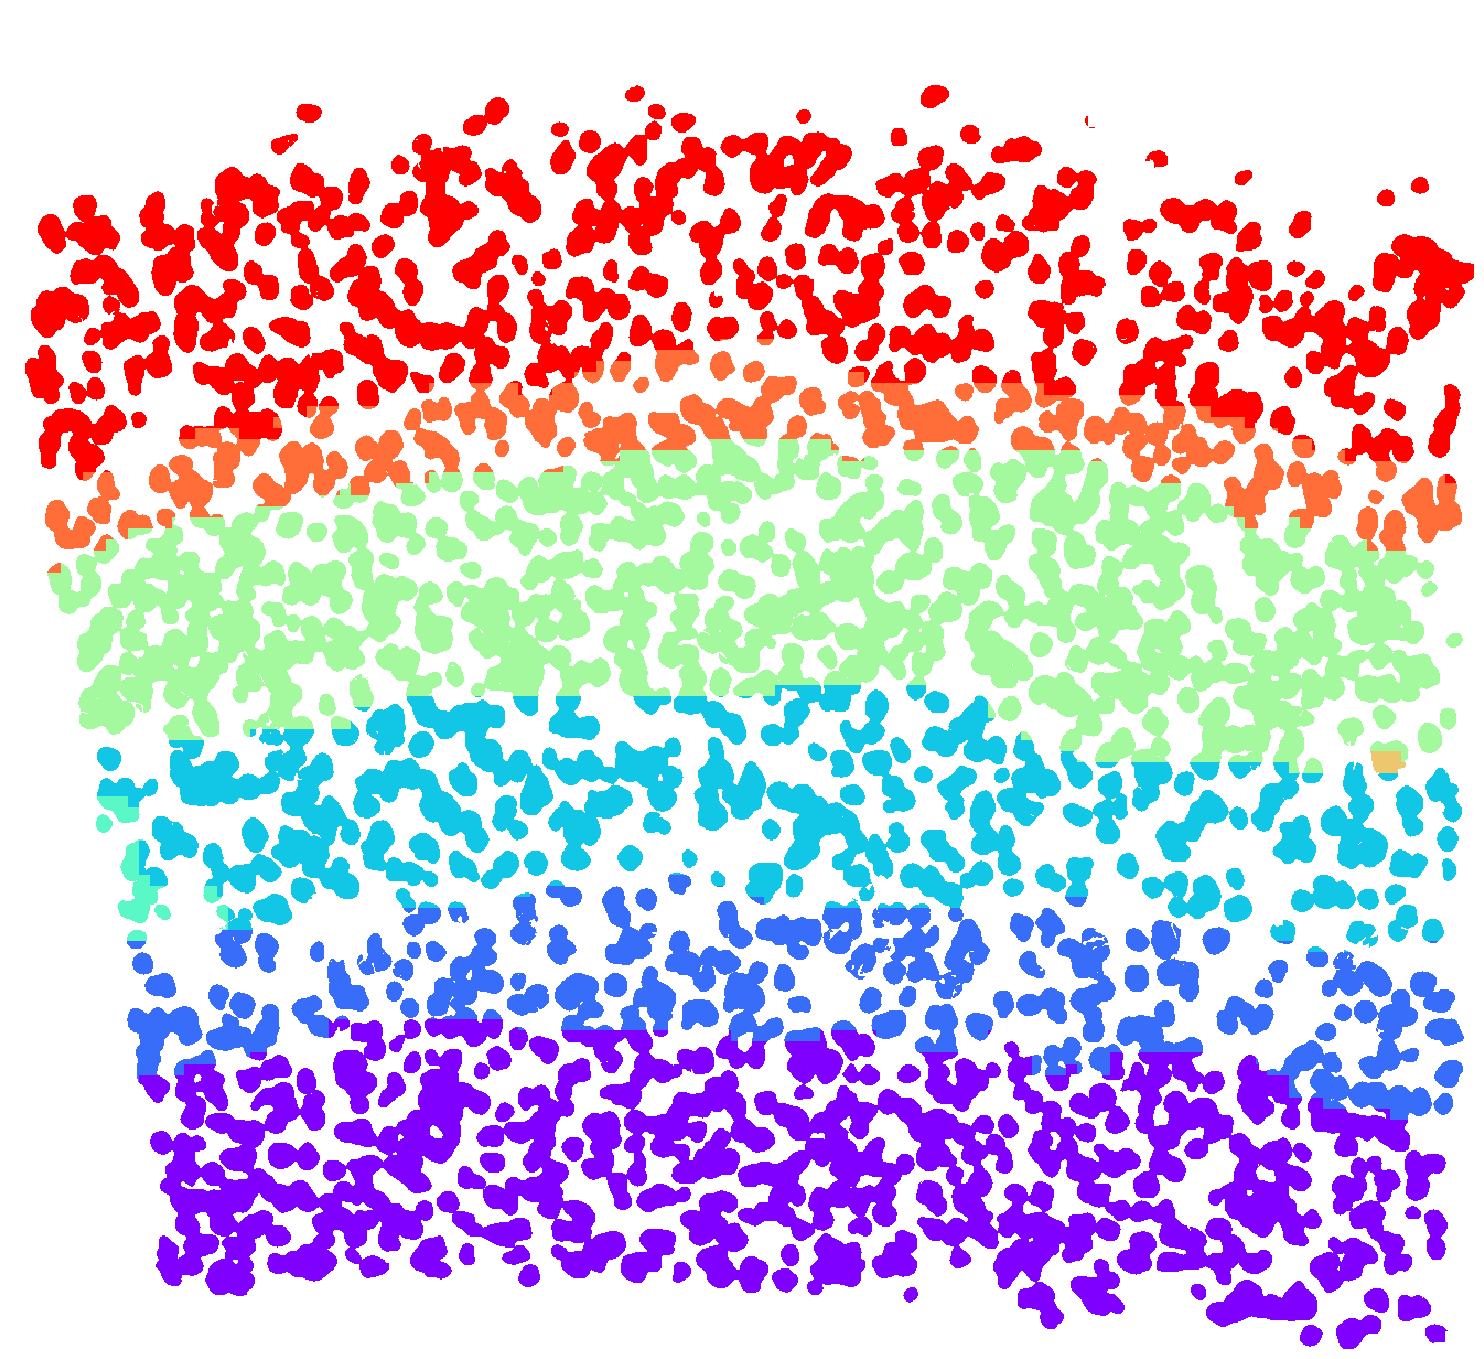

In [26]:
plt.figure(figsize=[15, 15])
ds.plot_domains(cmap='rainbow', z=0)
plt.axis('off')
plt.tight_layout()

In [5]:
import spatialdata as sd

# ds.celltype_binned_counts had shape (x, y, 1, c), but we need (c, y, x)
celltype_binned_counts = sd.models.Image2DModel.parse(np.squeeze(ds.celltype_binned_counts, 2), dims=('y', 'x', 'c'))

# ds.celltype_binned_centers had shape (x, y, 1), but we need (y, x)
celltype_binned_centers = sd.models.Labels2DModel.parse(np.squeeze(ds.celltype_binned_centers, 2), dims=('y', 'x'))
celltype_maps = sd.models.Labels2DModel.parse(np.squeeze(ds.celltype_maps+1, 2), dims=('y', 'x'))
filtered_celltype_maps = sd.models.Labels2DModel.parse(np.squeeze(ds.filtered_celltype_maps+1, 2), dims=('y', 'x'))
inferred_domains = sd.models.Labels2DModel.parse(np.squeeze(ds.inferred_domains+1, 2), dims=('y', 'x'))
inferred_domains_cells = sd.models.Labels2DModel.parse(np.squeeze(ds.inferred_domains_cells+1, 2), dims=('y', 'x'))

sdata = sd.SpatialData(images={'celltype_binned_counts': celltype_binned_counts},
                       labels={'celltype_binned_centers': celltype_binned_centers, 
                               'celltype_maps': celltype_maps,
                               'filtered_celltype_maps': filtered_celltype_maps, 
                               'inferred_domains': inferred_domains, 
                               'inferred_domains_cells':inferred_domains_cells})

sdata.write('ssam-osmfish-spatialdata.zarr')

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


TypeError: Unsupported type: <class 'xarray.core.dataarray.DataArray'>